In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [9]:
import seaborn as sns

In [10]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
Observations:-
    
1. There is difference between mean and median.
2. There is a difference in 75% percentile and max.
3.These observations suggest that there are outliers in these columns.
4. The mean value is lower than 50% it shows there is littel skwness present.

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb6dabc340>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb6dabc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb6dabc070>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb6dabce80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb6dacb190>],
 'means': []}

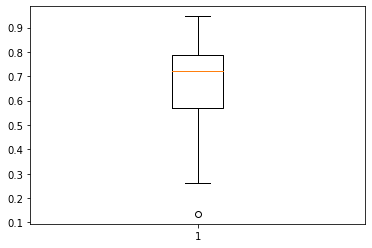

In [12]:
plt.boxplot(df.MonthlyCharges)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb6db29730>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb6db29d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb6db29580>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb6db382e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb6db385b0>],
 'means': []}

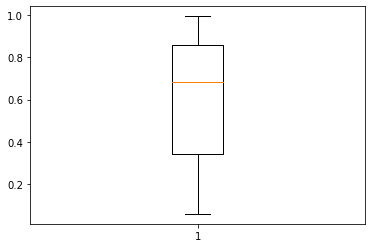

In [13]:
plt.boxplot(df.tenure)

Text(0.5, 1.0, 'MonthlyCharges')

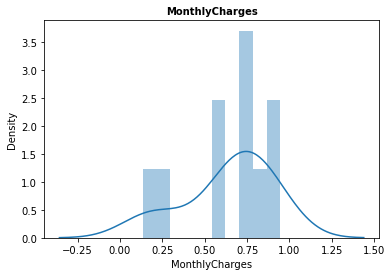

In [16]:
sns.distplot(df['MonthlyCharges'],bins=10)
plt.title('MonthlyCharges',fontsize=10,fontweight="bold")

In [ ]:
Observations:-

The mean value is higher than 50% it shows there is littel left skwness present 

   SeniorCitizen    tenure  MonthlyCharges
0       0.510128  0.164743        0.551082
1       0.643584  0.435985        0.946345
2       0.769318  0.774361        0.708328
3       0.412869  0.993651        0.734269
4       0.519673  0.059027        0.803370
5       0.898073  0.881431        0.621652
6       0.639662  0.804904        0.739283
7       0.652371  0.878039        0.134961
8       0.918795  0.311851        0.884566
9       0.394526  0.593286        0.262696


<AxesSubplot:>

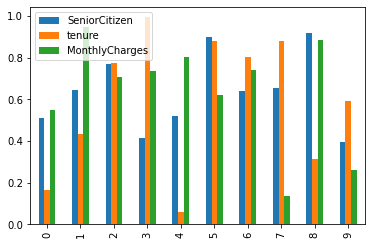

In [7]:
df=pd.DataFrame(np.random.rand(10,3),columns=['SeniorCitizen', 'tenure','MonthlyCharges'])
print(df)
df.plot.bar()

In [8]:
df.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   10 non-null     float64
 1   tenure          10 non-null     float64
 2   MonthlyCharges  10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


<AxesSubplot:>

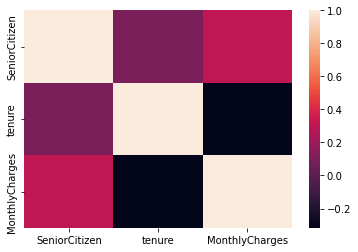

In [17]:
sns.heatmap(df.corr())

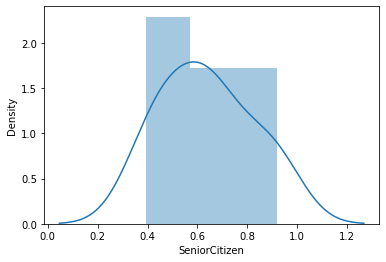

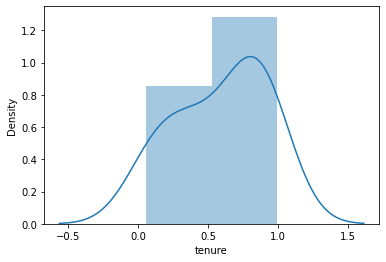

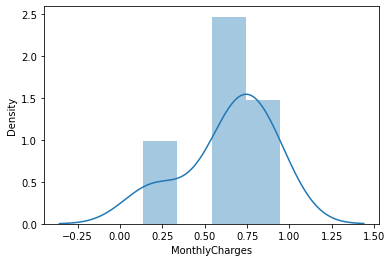

In [18]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

Text(0.5, 1.0, 'Monthly Charges')

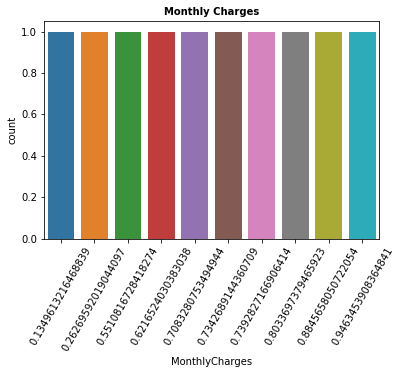

In [19]:
sns.countplot(x='MonthlyCharges',data=df)
plt.xticks(rotation=60,fontsize=10)
plt.title('Monthly Charges',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'tenure')

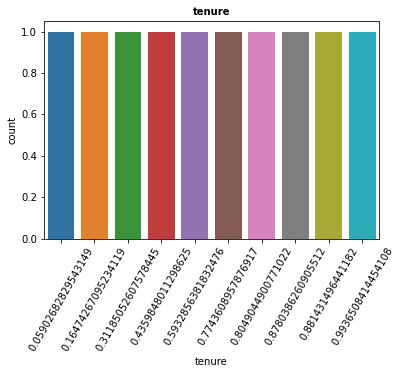

In [20]:
sns.countplot(x='tenure',data=df)
plt.xticks(rotation=60,fontsize=10)
plt.title('tenure',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'gender')

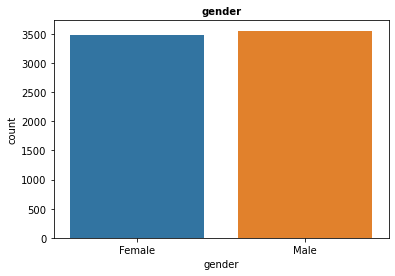

In [12]:
sns.countplot(x='gender',data=df)
plt.title('gender',fontsize=10,fontweight="bold")

Observations:-
    
As we can see both males and females are having equal count 

Text(0.5, 1.0, 'Dependents')

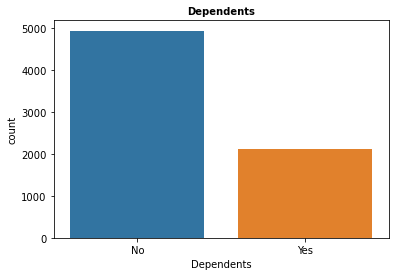

In [13]:
sns.countplot(x='Dependents',data=df)
plt.title('Dependents',fontsize=10,fontweight="bold")

Observations:-
    
     we can see fewer numbers of people are dependent that's why the 
numbers of churn are increasing

Text(0.5, 1.0, 'PhoneService')

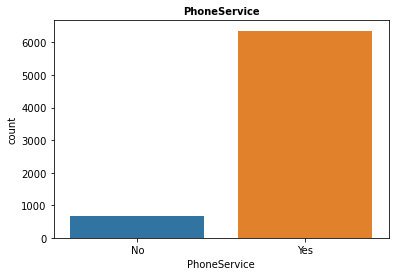

In [14]:
sns.countplot(x='PhoneService',data=df)
plt.title('PhoneService',fontsize=10,fontweight="bold")

Observations:-
    
    we can observe that the number of phone service are higher which means
maximum people are having phone then we can offer them a great deal to incearse rate of increase rate of customer.

Text(0.5, 1.0, 'InternetService')

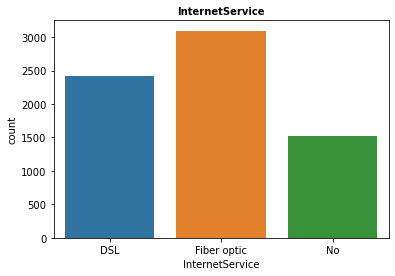

In [15]:
sns.countplot(x='InternetService',data=df)
plt.title('InternetService',fontsize=10,fontweight="bold")

In [ ]:
Observations:-
    
    we can observe that the number ofInternet Service are higher, we can increas our customer rate

Text(0.5, 1.0, 'Partner')

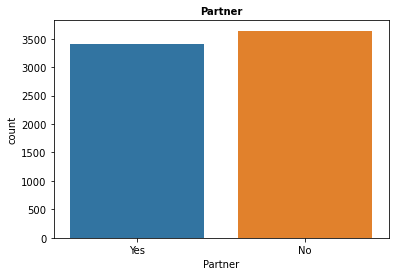

In [16]:
sns.countplot(x='Partner',data=df)
plt.title('Partner',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Contract')

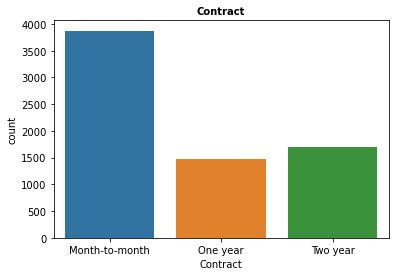

In [17]:
sns.countplot(x='Contract',data=df)
plt.title('Contract',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'DeviceProtection')

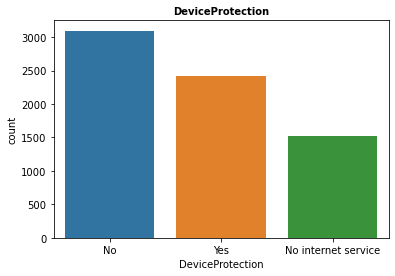

In [18]:
sns.countplot(x='DeviceProtection',data=df)
plt.title('DeviceProtection',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'PaymentMethod')

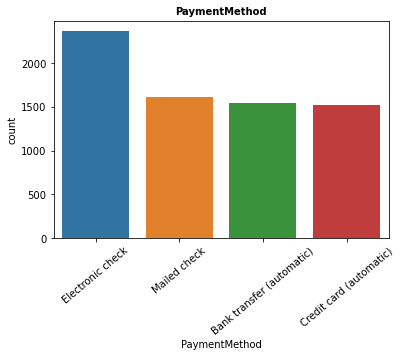

In [21]:
sns.countplot(x='PaymentMethod',data=df)
plt.xticks(rotation=400,fontsize=10)
plt.title('PaymentMethod',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'OnlineBackup')

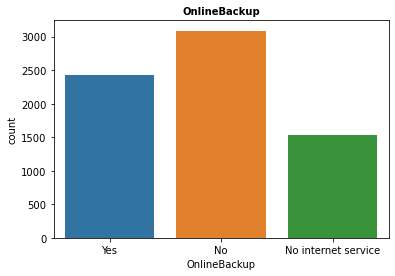

In [22]:
sns.countplot(x='OnlineBackup',data=df)
plt.title('OnlineBackup',fontsize=10,fontweight="bold")

Text(0.5, 1.0, 'Churn')

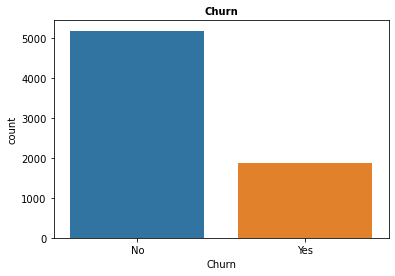

In [23]:
sns.countplot(x='Churn',data=df)
plt.title('Churn',fontsize=10,fontweight="bold")

Observations:-
    
Based on the above observations we can see that the rate of a customer can increase by small efforts
by improving our offers as we can see that the maximum numbers of customer are having internet
use we can offer them grate deal on the internet